### Load and Clean Data

In [1]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import defaultdict
from itertools import groupby
import seaborn as sns

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)


def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [2]:
path = 'data/Office_Products_5.json.gz'
df = getDF(path)

In [3]:
df.shape

(800357, 12)

In [4]:
df[:3]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN


At the moment, we aren't using **'image'** and **'style'**

In [5]:
df = df.drop('image', 1)
df['vote'].fillna(0, inplace=True)

In [6]:
uniDf = df.drop('style', 1).drop_duplicates()
uniDf.shape

(750515, 10)

In [7]:
uniDf.drop_duplicates(subset=['reviewerID', 'asin']).shape

(740703, 10)

In [8]:
uniDf['vote'] = uniDf['vote'].apply(lambda v : str(v).replace(',', ''))
uniDf['vote'] = pd.to_numeric(uniDf['vote'])
uniDf['reviewText'].fillna('', inplace=True)

In [9]:
uniDf.reset_index(drop=True)
uniDf = uniDf[uniDf['reviewText'].apply(lambda x: len(x) <= 1000)]

### Rating Historgram

In [10]:
ratings = list(uniDf['overall'])
votes = list(uniDf['vote'])
items = list(uniDf['asin'])
verified = list(uniDf['verified'])
reviews = list(uniDf['reviewText'])

count_r = [0] * 6
count_verified = [0] * 6
count_non_verified = [0] * 6
r_items = defaultdict(list)
count_r_items = [0] * 6
count_review_length = [0] * 7

In [11]:
item_rating = []
for i in range(len(ratings)):
    r_items[items[i]].append(ratings[i])
for item in r_items:
    counts = np.bincount(r_items[item])
    count = np.argmax(counts)
    count_r_items[count] += 1
count_r_items = count_r_items[1:]

In [12]:
zero_votes = []
non_zero_votes = []
verified_rating = []
non_verified_rating = []
review_length = []

for i in range(len(ratings)):
    if verified[i] == True:
        count_verified[int(ratings[i])] += 1
        verified_rating.append(ratings[i])
    else :
        count_non_verified[int(ratings[i])] += 1
        non_verified_rating.append(ratings[i])
    count_r[int(ratings[i])] += 1
    review_length.append(len(str(reviews[i])))

In [13]:
max_len = 0
for review in reviews:
    if type(review) == float:
        print(review)
    if len(review) > max_len:
        max_len = len(review)
max_len = max_len/7

In [14]:
i = 0
for k, g in groupby(sorted(review_length), key=lambda x: x//max_len):
    count_review_length[i] = len(list(g))
    i += 1
print(count_review_length)

[441180, 136975, 61711, 34454, 21067, 13823, 9504]


In [15]:
print(count_r)
print(count_verified)
print(count_non_verified)
#print(review_length)

[0, 27305, 20704, 44197, 106978, 519530]
[0, 23176, 18114, 39010, 93105, 476757]
[0, 4129, 2590, 5187, 13873, 42773]


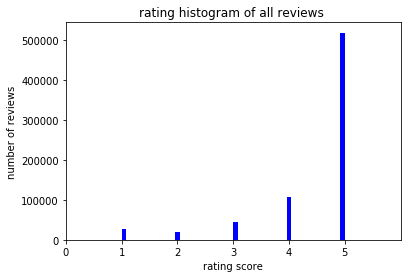

In [16]:
n,bins,patches = plt.hist(ratings,50, facecolor='blue')
plt.xlim([0,6])
plt.xlabel("rating score")
plt.ylabel("number of reviews")
plt.title("rating histogram of all reviews ")
plt.xticks(np.arange(0,6,1))
plt.savefig('rating_histogram')
plt.show()

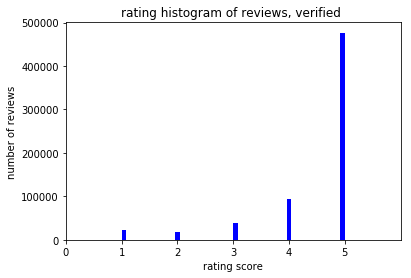

In [17]:
n,bins,patches = plt.hist(verified_rating,50, facecolor='blue')
plt.xlim([0,6])
plt.xlabel("rating score")
plt.ylabel("number of reviews")
plt.title("rating histogram of reviews, verified ")
plt.xticks(np.arange(0,6,1))
plt.savefig('verified_rating_histogram')
plt.show()

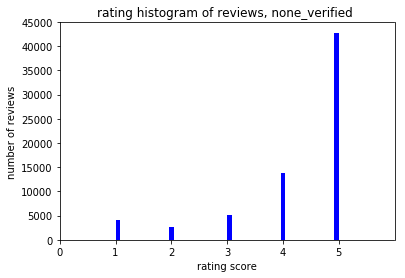

In [18]:
n,bins,patches = plt.hist(non_verified_rating,50, facecolor='blue')
plt.xlim([0,6])
plt.xlabel("rating score")
plt.ylabel("number of reviews")
plt.title("rating histogram of reviews, none_verified ")
plt.xticks(np.arange(0,6,1))
plt.savefig('none_verified rating_histogram')
plt.show()

### Rating Percentage by Items

Text(0.5, 1.0, 'rating percentage of items')

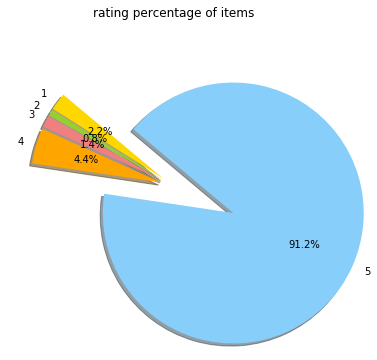

In [19]:
labels = ['1', '2', '3','4','5']
colors = ['gold', 'yellowgreen', 'lightcoral', 'orange','lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1, 0.5)  # explode 1st slice


fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
ax.pie(count_r_items, labels=labels,explode = explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title("rating percentage of items")

### Review Length Distribution

overall
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: reviewTextLength, dtype: object

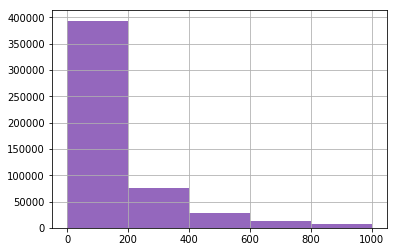

In [20]:
uniDf['reviewTextLength'] = uniDf['reviewText'].apply(lambda rt : len(rt))
uniDf .groupby('overall').reviewTextLength.hist(range=[0, 1000], bins=5)

Text(0.5, 1.0, 'review length')

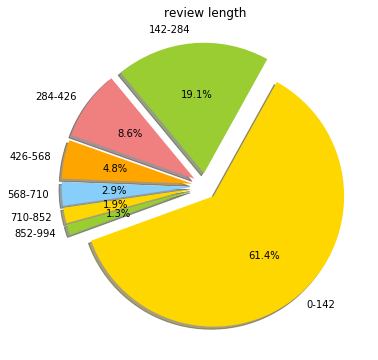

In [21]:
max_len = int(max_len)
labels = ['0-'+str(max_len), str(max_len)+'-'+str(max_len*2), str(max_len*2)+'-'+str(max_len*3),str(max_len*3)+'-'+str(max_len*4),str(max_len*4)+'-'+str(max_len*5), str(max_len*5)+'-'+str(max_len*6), str(max_len*6)+'-'+str(max_len*7)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'orange','lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
ax.pie(count_review_length, labels=labels,explode = explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)
ax.set_title("review length")

### Vote Distribution on Rating

In [22]:
uniDf.dtypes

overall             float64
verified               bool
reviewTime           object
reviewerID           object
asin                 object
reviewerName         object
reviewText           object
summary              object
unixReviewTime        int64
vote                  int64
reviewTextLength      int64
dtype: object

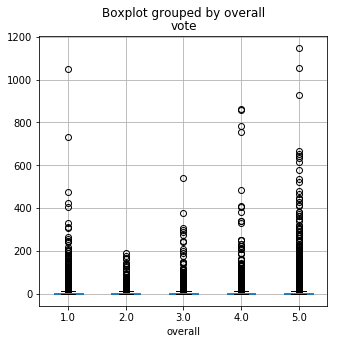

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
plt.suptitle('')
uniDf[uniDf['vote'] != 0].boxplot(column=['vote'], by='overall', ax=ax)

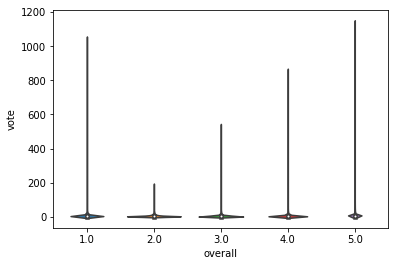

In [24]:
sns.violinplot(data=uniDf[uniDf['vote'] != 0], x='overall', y='vote')

### Extract and save each review and its rating

In [25]:
uniDf.to_csv(path.strip('.json.gz') + '.csv', columns = ['reviewerID', 'asin', 'overall'], index=False)

### Obtain Styles and Save to JSON

In [26]:
styles = defaultdict(set)
for style in df['style'].values:
    if type(style) != dict:
        continue
    for key in style:
        styles[key.replace(':', '')].add(style[key])

In [27]:
with open(path.strip('.json.gz')+'_styles.json', 'w') as fp:
    data = {key:list(styles[key]) for key in styles}
    json.dump(data, fp, sort_keys=True, indent=4)

### Temporal Effects

Trend of number of reviews and average ratings over months

In [28]:
minMonth = uniDf['unixReviewTime'].min()//(30*24*60*60)

def unixTimeToMonth(row):
    return row['unixReviewTime']//(30*24*60*60) - minMonth

uniDf['normalizedMonth'] = uniDf.apply(unixTimeToMonth, axis=1)

print('Range of normalized months: {0} - {1}'.format(uniDf['normalizedMonth'].min(), uniDf['normalizedMonth'].max()))

Range of normalized months: 0 - 231


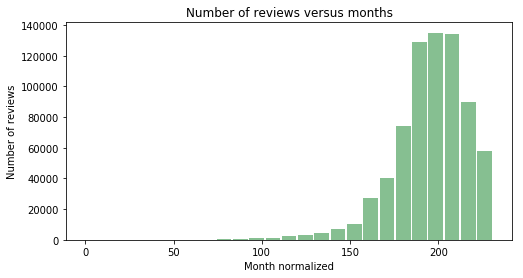

In [29]:
ax = uniDf.hist('normalizedMonth', bins=25, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.9)
for x in ax[0]:
    x.set_title('Number of reviews versus months')
    x.set_xlabel('Month normalized')
    x.set_ylabel('Number of reviews')

Text(0.5, 1.0, 'Average rating versus months')

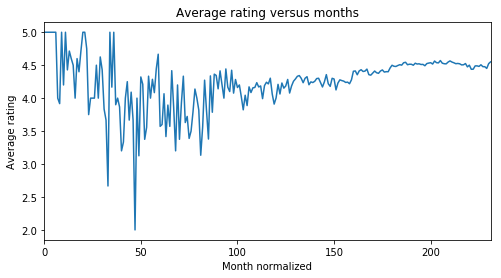

In [30]:
avgRatings = uniDf.groupby('normalizedMonth').mean()['overall']
ax = avgRatings.plot(figsize=(8,4))
ax.set_ylabel('Average rating')
ax.set_xlabel('Month normalized')
ax.set_title('Average rating versus months')

### Prepare Text for Sentimental Analysis

E.g.
Given fn.json with rating from 1 to 3,
generate fn_1.txt, fn_2.txt, fn_3.txt

In [31]:
def clean_text(text):
    return text.replace('\n', '')


def extract_review_text(path, uniDf):
    # [1.0, 2.0, 3.0, 4.0, 5.0]
    rating_vals = set(uniDf['overall'].tolist())
    print('Ratings are: {}'.format(rating_vals))

    fps = {r: open('%s_%s.txt'%(path, str(r)), 'w') for r in rating_vals}
    for r in rating_vals:
        reviews = list(uniDf[uniDf['overall']==r]['reviewText'].values)
        print('Extracting reviews for rating {}'.format(r))
        for review in reviews:
            fps[r].write(clean_text(review) + '\n')

    for r in fps:
        fps[r].close()
    
    print('Finish extracting reviews!')

In [32]:
extract_review_text(path, uniDf)

Ratings are: {1.0, 2.0, 3.0, 4.0, 5.0}
Extracting reviews for rating 1.0
Extracting reviews for rating 2.0
Extracting reviews for rating 3.0
Extracting reviews for rating 4.0
Extracting reviews for rating 5.0
Finish extracting reviews!
